<a href="https://colab.research.google.com/github/Saritah22/se-alessysistemas/blob/main/punto_2_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Sea la senal portadora $c(t) = A_c sin(2πF_ct)$, con $A_c, F_c ∈ R$, y la senal mensaje $m(t) ∈ R$. Encuentre el espectro en
frecuencia de la senal modulada en amplitud (AM), $y(t)= (1 + \frac{m(t)}{A_c})
c(t)$. Luego, descargue desde youtube 5 segundos de
su cancion favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la cancion escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la senal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada.

  Nota: se sugiere utilizar un canal de senal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el índice de
modulacion deseado.

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathcal{F}\{y(t)\} = \mathcal{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathcal{F}\{c(t)\}+\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\}$$

Utilizando tablas de Fourier:

$$C(\omega) = \mathcal{F}\{c(t)\} = \mathcal{F}\{A_c\sin(2\pi F_c t)\} = A_c\mathcal{F}\left\{\frac{e^{2\pi F_ct}-e^{-2\pi F_ct}}{2j}\right\}$$

y

$$\mathcal{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathcal{F}\{m(t)A_c\sin(2\pi F_c t)\} = \mathcal{F}\{m(t)\sin(2\pi F_c t)\} = \mathcal{F}\left\{\frac{m(t)e^{2\pi F_ct}-m(t)e^{-2\pi F_ct}}{2j}\right\}$$

teniendo en cuenta que:

$$\mathcal{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$\boxed{\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c)) + \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.cos(2*np.pi*Fm*t) #mensaje

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)



1.25


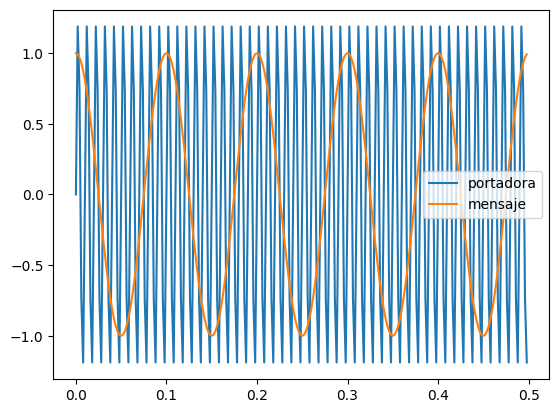

In [3]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

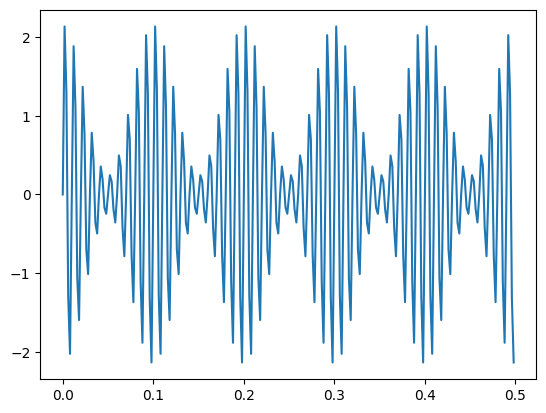

In [4]:
#se modula la señal a partir de la señal mensaje y señal portadora
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('')
plt.ylabel('')
plt.show()

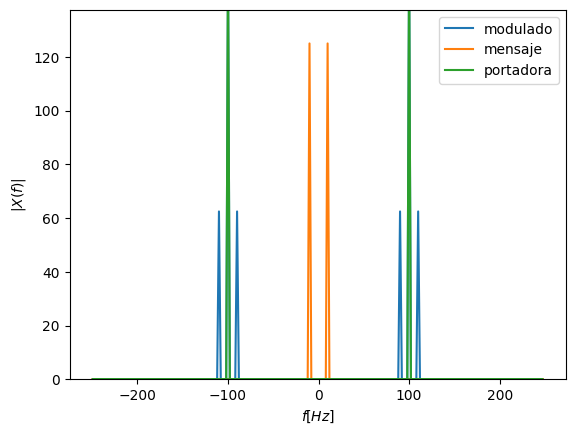

In [5]:
# a partir de la fft se calcula el espectro de la señal portadora, mensaje y modulada
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [6]:
#Se instala api para descargar videos desde youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     - 2.7 MB 14.4 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-hh_niyvw/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [7]:
link="https://www.youtube.com/watch?v=hd0cl2d2ziU"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=hd0cl2d2ziU
[youtube] hd0cl2d2ziU: Downloading webpage
[youtube] hd0cl2d2ziU: Downloading tv client config
[youtube] hd0cl2d2ziU: Downloading player f3d47b5a
[youtube] hd0cl2d2ziU: Downloading tv player API JSON
[youtube] hd0cl2d2ziU: Downloading ios player API JSON
[youtube] hd0cl2d2ziU: Downloading m3u8 information
[info] hd0cl2d2ziU: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    4.81MiB in 00:00:00 at 12.31MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [8]:
!ffmpeg -y -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [9]:
!pip install soundfile

In [10]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [11]:
x.shape

(14075194, 2)

In [ ]:
#Se observa que la canción x tiene dos columnas (canal de audio derecho e izquierdo). Por simplicidad se va a trabajar solamente con el primer canal

In [12]:
from IPython.display import Audio
Audio(x[int(fs*20):int(fs*25),:].T,rate=fs)

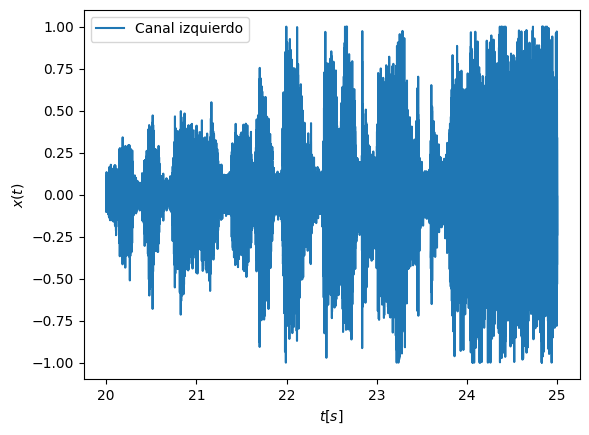

In [13]:
xpro = x.copy() #copiar archivos para procesar
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),0]

tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs,label="Canal izquierdo")
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

In [14]:
len(xs)

240000

In [15]:
# el usuario debe ingresar el indice de modulacion
Im=float(input("Ingrese el indice de modulacion que desea:  "))

Ingrese el indice de modulacion que desea:  0.8


In [27]:
#Frecuencia portadora y muestreo

Fc = 1000 #frecuencia de portadora

ti = 20
tf = 25 #cantidad de periodos a graficar de la

Fs = 48000 #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo


Ac = max(abs(xs))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


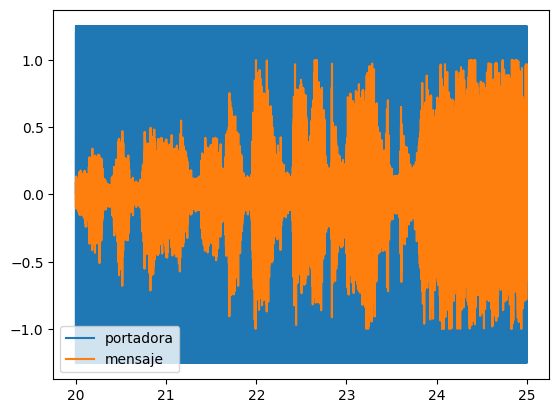

In [17]:
plt.plot(t,c,label='portadora')
plt.plot(t,xs,label='mensaje')
plt.legend()
plt.show()

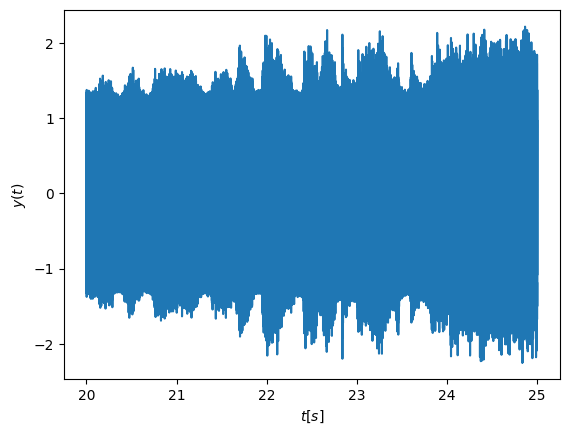

In [18]:
y = (1+xs/Ac)*c #señal modulada en AM

plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

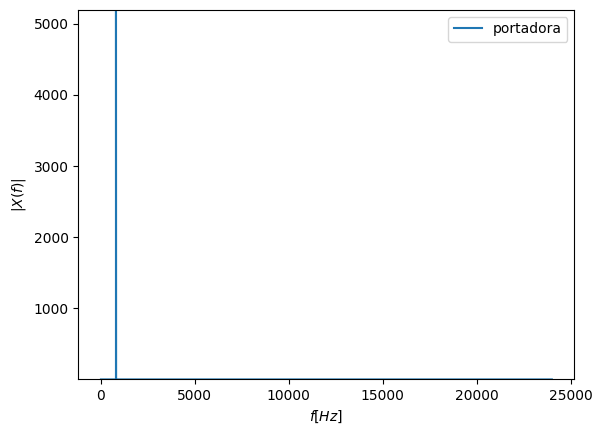

In [25]:
#se presenta el espectro de la señal mensaje (cancion), portadora y modulada Debido a que no hay componente imaginaria, se puede usar la transformada real rápida de fourier. Para valores de frecuencia negativo el gráfico se refleja (simetría par)
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(xs)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs)

#plt.plot(vfre,abs(Xfy),label='modulado')
#plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()


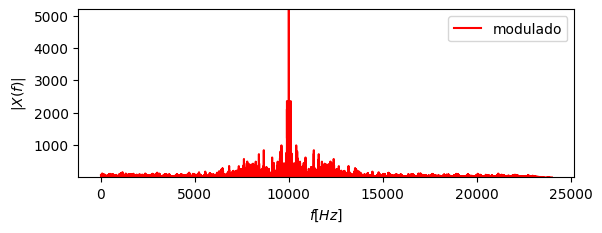

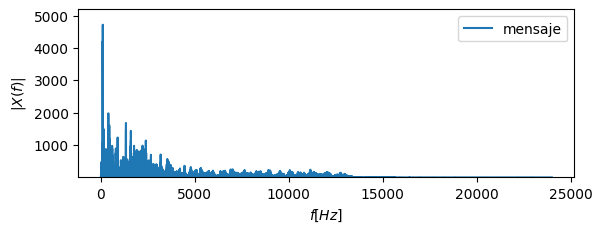

In [20]:
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfy),label='modulado',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [21]:
#audio de la portadora
Audio(c,rate=fs)

In [22]:
#audio del mensaje
Audio(xs,rate=fs)

In [23]:
#audio de la señal modulada
Audio(y,rate=fs)